# Import Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import Mymodule

# Web Scraping

In [2]:
url = 'https://www.flipkart.com/search?q=laptop+under+20000&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_2_13_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_13_na_na_na&as-pos=2&as-type=RECENT&suggestionId=laptop+under+20000%7CLaptops&requestId=391506f8-dfb9-4bb7-8fea-8cdec70a9443&as-searchtext=laptop%20under%20'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')
page_link = soup.find('a', class_='ge-49M _2Kfbh8').get('href')
chage_link = 'https://flipkart.com'+page_link
print(chage_link)

https://flipkart.com/search?q=laptop+under+20000&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_2_13_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_13_na_na_na&as-pos=2&as-type=RECENT&suggestionId=laptop+under+20000%7CLaptops&requestId=391506f8-dfb9-4bb7-8fea-8cdec70a9443&as-searchtext=laptop+under+&page=1


<b>Collecting Information about laptop under Rs. 20000 From FlipKart And Creating Dataset</b>

In [3]:
product_name = []
prices = []
totals = []
offer = []
rating = []
processor = []
description = []

for i in range(1, 51):
    url = f"{chage_link[:-1]}{i}"
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'lxml')
    box = soup.find('div', class_='_1YokD2 _3Mn1Gg')
    product_details = box.find_all('div', class_='_3pLy-c row')
    
    for detail in product_details:
        name = detail.find('div', class_='_4rR01T')
        if name is not None:
            product_name.append(name.text)
        else:
            product_name.append('N/A')
            
        price = detail.find('div', class_='_30jeq3 _1_WHN1')
        if price is not None:
            prices.append(price.text)
        else:
            prices.append('N/A')
            
        total = detail.find('div', class_='_3I9_wc _27UcVY')
        if total is not None:
            totals.append(total.text)
        else:
            totals.append('N/A')
            
        off = detail.find('div', class_='_3Ay6Sb')
        if off is not None:
            off_span = off.find('span')
            if off_span is not None:
                offer.append(off_span.text)
            else:
                offer.append('N/A')
        else:
            offer.append('N/A')
            
        rate = detail.find('div', class_='_3LWZlK')
        if rate is not None:
            rating.append(rate.text)
        else:
            rating.append('N/A')
        
        pro = detail.find('li', class_='rgWa7D')
        if pro is not None:
            processor.append(pro.text)
        else:
            processor.append('N/A')
            
        desc = detail.find('ul', class_='_1xgFaf')
        if desc is not None:
            description.append(desc.text)
        else:
            description.append('N/A')

if len(product_name) == len(prices) == len(totals) == len(offer) == len(rating) == len(processor) == len(description):
    # convert datafram
    df = pd.DataFrame({"Product_Name":product_name,"Total":totals,"Selling_Price":prices,"Offer":offer,"Ratings":rating,"Processor":processor,"Description":description})
    # convert csv file and save file in memory
    df.to_csv('laptop_under_20000.csv', index=False)
    
    # Display Message
    print('SucessFully Created Dataset')
else:
    print('-----------Arrays are not equals.--------------')
    print("Length of Product Name:", len(product_name))
    print("Length of Selling Price:", len(prices))
    print("Length of Total:", len(totals))
    print("Length of Offers:", len(offer))
    print("Length of Rating:", len(rating))
    print("Length of Processor:", len(processor))
    print("Length of Description:", len(description))

SucessFully Created Dataset


# Explore data

In [4]:
df.head()

,Product_Name,Total,Selling_Price,Offer,Ratings,Processor,Description
0,Lenovo Slim 3 Chromebook Touch Intel Celeron D...,"₹39,990","₹18,990",52% off,3.7,Intel Celeron Dual Core Processor,Intel Celeron Dual Core Processor4 GB LPDDR4 R...
1,Infinix Y1 Plus Neo (2023) Celeron Quad Core 1...,"₹29,990","₹20,990",30% off,4.1,Intel Celeron Quad Core Processor (11th Gen),Intel Celeron Quad Core Processor (11th Gen)4 ...
2,Lenovo Athlon Dual Core 3050U - (4 GB/256 GB S...,"₹35,000","₹18,999",45% off,N/A,AMD Athlon Dual Core Processor,AMD Athlon Dual Core Processor4 GB DDR4 RAMWin...
3,Lenovo Athlon Dual Core 3050U - (4 GB/256 GB S...,"₹37,450","₹17,490",53% off,3.6,AMD Athlon Dual Core Processor,AMD Athlon Dual Core Processor4 GB DDR4 RAMDOS...
4,Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS...,"₹38,000","₹18,049",52% off,N/A,AMD Athlon Dual Core Processor,AMD Athlon Dual Core Processor4 GB DDR4 RAMDOS...


In [5]:
df.shape

(984, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_Name   984 non-null    object
 1   Total          984 non-null    object
 2   Selling_Price  984 non-null    object
 3   Offer          984 non-null    object
 4   Ratings        984 non-null    object
 5   Processor      984 non-null    object
 6   Description    984 non-null    object
dtypes: object(7)
memory usage: 53.9+ KB


# Exploratory Data Analysis and Data Cleaning

In [7]:
# replace 'N/A' to np.nan
df.replace('N/A', np.nan, inplace=True)

In [8]:
df.isnull().sum()

Product_Name       0
Total             66
Selling_Price      0
Offer             69
Ratings          433
Processor          0
Description        0
dtype: int64

In [9]:
df.dropna(subset=['Total','Selling_Price','Offer'], inplace=True, axis=0)

In [10]:
df['Total'] = df['Total'].str.replace('₹', '').str.replace(',', '').astype('int')
df['Selling_Price'] = df['Selling_Price'].str.replace('₹', '').str.replace(',', '').astype('int')
df['Offer'] = df['Offer'].str.replace('off', '')

In [11]:
avg_rating = round(df['Ratings'].astype('float').mean(),1)
df['Ratings'].fillna(avg_rating, inplace=True)
df['Ratings'] = df['Ratings'].astype('float')

In [12]:
df['RAM'] = df['Description'].str.extract(r'(\d+\s*GB)')

In [13]:
df['Product_Name'] = df['Product_Name'].str.split('-')
df['Product_Name'] = df['Product_Name'].str.get(0)

In [14]:
df['Brand'] = df['Product_Name'].str.split()
df['Brand'] = df['Brand'].str.get(0)

In [15]:
df['Processor_Brand'] = df['Processor'].str.split()
df['Processor_Brand'] = df['Processor_Brand'].str.get(0)

In [16]:
df = df[['Product_Name','Brand','RAM','Offer','Ratings','Selling_Price','Total','Processor_Brand','Processor']]

In [17]:
df.isnull().sum()

Product_Name       0
Brand              0
RAM                0
Offer              0
Ratings            0
Selling_Price      0
Total              0
Processor_Brand    0
Processor          0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 983
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_Name     915 non-null    object 
 1   Brand            915 non-null    object 
 2   RAM              915 non-null    object 
 3   Offer            915 non-null    object 
 4   Ratings          915 non-null    float64
 5   Selling_Price    915 non-null    int32  
 6   Total            915 non-null    int32  
 7   Processor_Brand  915 non-null    object 
 8   Processor        915 non-null    object 
dtypes: float64(1), int32(2), object(6)
memory usage: 64.3+ KB


In [19]:
# save clean dataset into csv
df.to_csv('Clean dataset laptop under 20000.csv', index=False)

In [20]:
# see clean dataset
df.head()

,Product_Name,Brand,RAM,Offer,Ratings,Selling_Price,Total,Processor_Brand,Processor
0,Lenovo Slim 3 Chromebook Touch Intel Celeron D...,Lenovo,4 GB,52%,3.7,18990,39990,Intel,Intel Celeron Dual Core Processor
1,Infinix Y1 Plus Neo (2023) Celeron Quad Core 1...,Infinix,4 GB,30%,4.1,20990,29990,Intel,Intel Celeron Quad Core Processor (11th Gen)
2,Lenovo Athlon Dual Core 3050U,Lenovo,4 GB,45%,4.2,18999,35000,AMD,AMD Athlon Dual Core Processor
3,Lenovo Athlon Dual Core 3050U,Lenovo,4 GB,53%,3.6,17490,37450,AMD,AMD Athlon Dual Core Processor
4,Lenovo Athlon Dual Core,Lenovo,4 GB,52%,4.2,18049,38000,AMD,AMD Athlon Dual Core Processor


# Data Analysis and Visulizations

Total Laptop

In [22]:
Mymodule.design_text(f"Total laptops are: {len(df['Product_Name'].unique())}pcs.")

+----------------------------+
| Total laptops are: 398pcs. |
+----------------------------+


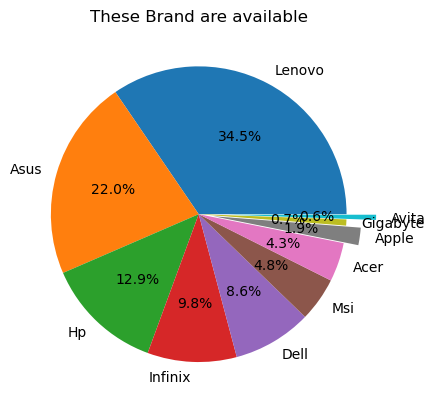

In [23]:
laptop_brand = df.groupby('Brand', as_index=False)['Product_Name'].count().sort_values(by='Product_Name', ascending=False).head(10)
brand_name = [i.capitalize() for i in laptop_brand['Brand']]
myexplode = [0,0,0,0,0,0,0,0.1,0,0.2]
plt.pie(laptop_brand['Product_Name'], labels=brand_name, explode=myexplode, autopct='%1.1f%%')
plt.title('These Brand are available')
plt.show()

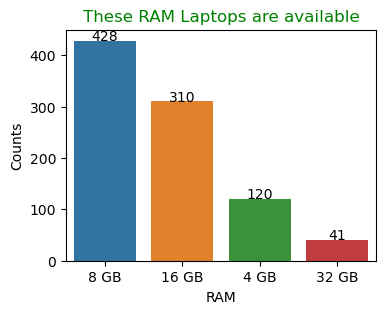

In [24]:
ram_type = df.groupby('RAM', as_index=False)['Brand'].count().sort_values(by='Brand', ascending=False).head(4)
plt.figure(figsize=(4,3))
ax = sns.barplot(x='RAM', y='Brand', data=ram_type)
plt.title('These RAM Laptops are available',color='g')
plt.ylabel('Counts')
for bars in ax.containers:
    ax.bar_label(bars, padding=-2)

In [25]:
top_rating_brand = df.groupby(['Brand'], as_index=False)['Ratings'].mean().round(1).sort_values(by='Ratings', ascending=False).head(10)
Mymodule.formating_DataFrame(top_rating_brand, title='Top 10 rating Brands')

  Top 10 rating Brands
+---------------------+
| Brand     | Ratings |
+---------------------+
| APPLE     | 4.5     | 
| ASUS      | 4.3     | 
| Infinix   | 4.2     | 
| SAMSUNG   | 4.2     | 
| Primebook | 4.2     | 
| MSI       | 4.2     | 
| LG        | 4.2     | 
| realme    | 4.2     | 
| DELL      | 4.2     | 
| CHUWI     | 4.2     | 
+---------------------+


In [26]:
top_rating_processor = df.groupby('Processor_Brand',as_index=False)['Ratings'].mean().round(1).sort_values(by='Ratings',ascending=False)
processor_brands = ['AMD', 'Intel', 'MediaTek', 'Qualcomm']
x = top_rating_processor[top_rating_processor['Processor_Brand'].isin(processor_brands)]
Mymodule.formating_DataFrame(x, title='Processor')

          Processor
+---------------------------+
| Processor_Brand | Ratings |
+---------------------------+
| AMD             | 4.3     | 
| Intel           | 4.2     | 
| Qualcomm        | 4.0     | 
| MediaTek        | 3.9     | 
+---------------------------+


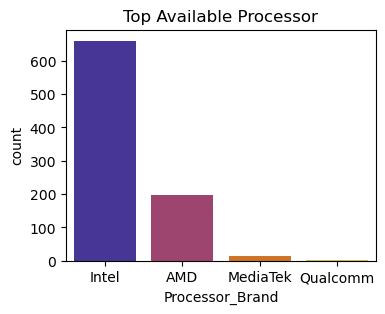

In [27]:
plt.figure(figsize=(4,3))
sns.countplot(x='Processor_Brand', data=df[df['Processor_Brand'].isin(processor_brands)], palette='CMRmap')
plt.title('Top Available Processor')
plt.show()

In [28]:
top_10_product = df.groupby('Product_Name',as_index=False)['Brand'].count().sort_values(by='Brand', ascending=False).head(10)
top_10_product['Counts'] = top_10_product['Brand']
Mymodule.formating_DataFrame(top_10_product[['Product_Name','Counts']], title='Top 10 Products Available')

                      Top 10 Products Available
+------------------------------------------------------------------+
| Product_Name                                            | Counts |
+------------------------------------------------------------------+
| Lenovo IdeaPad 3 Intel Core i3 11th Gen                 | 34     | 
| Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen          | 33     | 
| Lenovo IdeaPad 3 Core i3 12th Gen                       | 33     | 
| Lenovo Slim 3 Chromebook Touch Intel Celeron Dual Core  | 32     | 
| Lenovo IdeaPad 3 Core i3 11th Gen                       | 31     | 
| Infinix Y1 Plus Neo (2023) Celeron Quad Core 11th Gen   | 29     | 
| Lenovo Ideapad Gaming 3 AMD Ryzen 7 Octa Core 5800H     | 28     | 
| Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen    | 26     | 
| Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen            | 24     | 
| Infinix INBook Y1 Plus Intel Core i3 10th Gen           | 14     | 
+--------------------------------------------

In [29]:
x = df[df['Selling_Price']<=20000]
x = x[['Product_Name','Selling_Price','Ratings','Processor_Brand','RAM','Offer']].head(10)
Mymodule.formating_DataFrame(x, title='Laptop less than 20000')

                                                Laptop less than 20000
+--------------------------------------------------------------------------------------------------------------------+
| Product_Name                                            | Selling_Price | Ratings | Processor_Brand | RAM  | Offer |
+--------------------------------------------------------------------------------------------------------------------+
| Lenovo Slim 3 Chromebook Touch Intel Celeron Dual Core  | 18990         | 3.7     | Intel           | 4 GB | 52%   | 
| Lenovo Athlon Dual Core 3050U                           | 18999         | 4.2     | AMD             | 4 GB | 45%   | 
| Lenovo Athlon Dual Core 3050U                           | 17490         | 3.6     | AMD             | 4 GB | 53%   | 
| Lenovo Athlon Dual Core                                 | 18049         | 4.2     | AMD             | 4 GB | 52%   | 
| HP Chromebook x360 Intel Celeron Dual Core              | 17990         | 4.2     | Intel 

In [30]:
# Remove '%' character from the 'Offer' column
df['Offer'] = df['Offer'].str.replace('%', '')

# Convert 'Offer' column to integers
df['Offer'] = df['Offer'].astype(int)

# Find the row with the minimum offer
min_offer_row = df[df['Offer'] == df['Offer'].min()]

In [31]:
# Print the result
Mymodule.formating_DataFrame(min_offer_row[['Product_Name','RAM','Offer','Selling_Price','Processor']], title='Minimun Offers of product the product')

                                      Minimun Offers of product the product
+-------------------------------------------------------------------------------------------------------------+
| Product_Name                           | RAM   | Offer | Selling_Price | Processor                          |
+-------------------------------------------------------------------------------------------------------------+
| Acer Predator (2023) Core i9 13th Gen  | 16 GB | 3     | 199990        | Intel Core i9 Processor (13th Gen) | 
| ASUS ExpertBook P2 Core i7 10th Gen    | 8 GB  | 3     | 90490         | Intel Core i7 Processor (10th Gen) | 
+-------------------------------------------------------------------------------------------------------------+


In [32]:
# Find the row with the maximum offer
max_offer_row = df[df['Offer'] == df['Offer'].max()]

# Print the result
Mymodule.formating_DataFrame(max_offer_row[['Product_Name','RAM','Offer','Selling_Price']], title='Maximum Offers of the product')

                              Maximum Offers of the product
+-------------------------------------------------------------------------------------+
| Product_Name                                         | RAM  | Offer | Selling_Price |
+-------------------------------------------------------------------------------------+
| Lenovo IdeaPad 3 Chromebook Intel Celeron Dual Core  | 4 GB | 57    | 12990         | 
+-------------------------------------------------------------------------------------+


In [33]:
min_price_laptop = df.groupby('Product_Name', as_index=False)['Selling_Price'].min().sort_values(by='Selling_Price', ascending=True).head(10)
Mymodule.formating_DataFrame(min_price_laptop, title='Minimun price of Laptops')

                          Minimun price of Laptops
+---------------------------------------------------------------------------+
| Product_Name                                              | Selling_Price |
+---------------------------------------------------------------------------+
| Lenovo IdeaPad 3 Chromebook Intel Celeron Dual Core       | 12990         | 
| Primebook 4G Android Based MediaTek MT8788                | 12990         | 
| Primebook 4G enabled Android based MediaTek Kompanio 500  | 13990         | 
| ASUS EeeBook 12 Celeron Dual Core                         | 14990         | 
| Avita SATUS S111 Celeron Dual Core                        | 16490         | 
| HP Chromebook MediaTek Kompanio 500                       | 16990         | 
| Lenovo Athlon Dual Core 3050U                             | 17490         | 
| Lenovo Athlon Dual Core                                   | 17990         | 
| HP Chromebook x360 Intel Celeron Dual Core                | 17990         | 
| HP

In [34]:
min_price_laptop = df.groupby('Product_Name', as_index=False)['Selling_Price'].max().sort_values(by='Selling_Price', ascending=False).head(10)
Mymodule.formating_DataFrame(min_price_laptop, title='Maximum price of Laptops')

                                              Maximum price of Laptops
+-----------------------------------------------------------------------------------------------------------------+
| Product_Name                                                                                    | Selling_Price |
+-----------------------------------------------------------------------------------------------------------------+
| MSI Core i9 13th Gen                                                                            | 489990        | 
| MSI GT77 Titan Core i9 12th Gen                                                                 | 450000        | 
| ASUS ROG Zephyrus Duo 16 with 90WHr Battery Ryzen 9 16 Core 7945HX                              | 429990        | 
| ASUS ROG Strix Scar 17 SE (2022) with 90Whr Battery Core i9 12th Gen                            | 399990        | 
| ASUS ROG Zephyrus Duo 16 (2022) Dual Screen Laptop with 90Whr Battery Ryzen 9 Octa Core 6900HX  | 391990       

In [35]:
Mymodule.greeting('Neeraj Pandit')

Hello Neeraj Pandit have a good day.
